# Проект оператора связи

# «Прогнозирование оттока клиентов»

Описание проекта

Оператор связи планирует научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены специальные условия. 

**Цель проекта** - прогнозирование оттока клиентов.   

**Наша задача** - создать прототип модели машинного обучения, который позволит оператору связи своевременно выявлять клиентов, планирующих уйти в ближайшее время. Это позволит компании предложить клиентам скидки, тем самым сохранить клиента и увеличить прибыль.  

Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Данные состоят из файлов, полученных из разных источников:
* contract_new.csv — информация о договоре;
* personal_new.csv — персональные данные клиента;
* internet_new.csv — информация об интернет-услугах;
* phone_new.csv — информация об услугах телефонии. 

**Описание данных, предоставленное заказчиком:**

BeginDate – дата начала пользования услугами,   
EndDate – дата окончания пользования услугами,   
Type – тип оплаты: ежемесячный, годовой и тд,   
PaperlessBilling – безналичный расчет,   
PaymentMethod – способ оплаты,   
MonthlyCharges – ежемесячные траты на услуги,   
TotalCharges – всего потрачено денег на услуги   
Dependents – наличие иждивенцев   
Senior Citizen – наличие пенсионного статуса по возрасту   
Partner – наличие супруга(и)   
MultipleLines – наличие возможности ведения параллельных линий во время   
звонка   

**План проекта:**

**1. Загрузка и предобработка данных:**

* изучим общую информацию о полученных датасетах, посмотрим типы данных, пропуски, дубликаты;
* объединим все датасеты в один для удобства работы и последующего анализа;
* если среди признаков есть пропуски,то заполним их и обработаем аномалии;
* сгенерируем новый признак;
* после генерации новых признаков для предотвращения утечки данных удалим признаки BeginDate и EndDate; 
* краткий вывод

**2. Исследовательский анализ данных (EDA):**

* изучим целевой признак - проверим дисбаланс;
* проверим корреляцию числовых признаков на наличие мультиколлинеарности;
* рассмотрим влияние категориальных признаков на таргет - сравним 2 группы клиентов, тех кто ушел и лояльных (размер ежемесячных платежей, наличие супруга, иждивенцев, количество дополнительных услуг ит.д.) на факт ухода клиента;
* для наглядности построим графики зависимостей;
* удалим имеющиеся дубликаты;
* краткий вывод по EDA.

**3. Подготовка данных для обучения моделей:**

* введем константу RANDOM STATE = 220523;
* создадим переменные для признаков и целевого признака;
* разделим исходные данные на обучающую и тестовую выборки (test_size = 0.25);
* кодирование данных для линейных моделей;
* масштабирование данных для линейных моделей.

**4. Обучение моделей:**  

* обучим разные модели (линейные и бустинг)
* для оптимального подбора гиперпараметров будем использовать GridSearchCV;
* для оценки качества моделей будем использовать метрику AUC-ROC,ее значение должно быть >= 0.85; 
  в качестве дополнительной метрики будем использовать accuracy.   
* выбор лучшей модели;
* тестирование лучшей модели на тестовой выборке;
* анализ результатов, подсчет дополнительных метрик при необходимости, проверка на адекватность;
* построение ROC-кривой.

**5. Общий вывод.**

## Загрузка и предобработка данных

### Для предварительного анализа данных загрузим имеющиеся датасеты и рассмотрим их особенности.

In [1]:
# предварительно импортируем только библиотеку pandas 
import pandas as pd

In [ ]:
try:   
    contract = pd.read_csv('***')   
    personal = pd.read_csv('***')   
    internet = pd.read_csv('***')   
    phone = pd.read_csv('***')   
except:   
    contract = pd.read_csv('https://***')   
    personal = pd.read_csv('https://***')      
    internet = pd.read_csv('https://***')      
    phone = pd.read_csv('https://***')      

In [3]:
# напишем функцию для просмотра основной информации по датасетам
def main_info(data):
    print('Выведем первые 5 строк датафрейма')
    display(data.head(5))
    print()
    
    print('Основная информация о датафрейме')
    print()
    display(data.info())
    print()
    
    print('Описание данных')
    display(data.describe())
    print()
    
    print('Количество строк-дубликатов')
    display(data.duplicated().sum())
    print()
    
    print('Количество пропусков')
    display(data.isna().sum())
    print()
    
    print('Тип признаков')
    print(data.dtypes)
    

In [4]:
main_info(contract)

Выведем первые 5 строк датафрейма


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Описание данных


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



Количество строк-дубликатов


0


Количество пропусков


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


Тип признаков
customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [5]:
main_info(personal)

Выведем первые 5 строк датафрейма


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


Описание данных


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



Количество строк-дубликатов


0


Количество пропусков


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


Тип признаков
customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object


In [6]:
main_info(internet)

Выведем первые 5 строк датафрейма


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


Описание данных


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,6968-URWQU,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Количество строк-дубликатов


0


Количество пропусков


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


Тип признаков
customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object


In [7]:
main_info(phone)

Выведем первые 5 строк датафрейма


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None


Описание данных


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,6968-URWQU,No
freq,1,3390



Количество строк-дубликатов


0


Количество пропусков


customerID       0
MultipleLines    0
dtype: int64


Тип признаков
customerID       object
MultipleLines    object
dtype: object


**Вывод по загрузке данных**

В результате загрузки данных, полученных от телеком компании, мы получили 4 датасета с разным количеством строк.
Основным является датасет с информацией по контрактам, вторым по значимости будет второй датасет с персональными данными клиентов. У этих датасетов количество строк совпадает и составляет 7043.

Также у нас есть данные какими интернет услугами пользуется клиенты и какими услугами телефонии. Здесь количество строк отличается, это связано с тем, что  кто-то из клиентов пользуется только интернетом, а кто-то только услугами телефонии.

Соответственно, для полноценного анализа данных мы объединим все 4 датасета по `customerID`.

Также мы видим, что в столбце `EndDate` не везде отмечена дата окончания пользования услугами. Это говорит, о том, что у нас есть сведения не только об ушедших,но еще и о лояльных клиентах.

В некоторых столбцах (например, `TotalCharges`) требуется поменять тип данных.

Перед нами стоит задача бинарной классификации. Далее приступим к более детальной предобработке данных, в соответствии с нашим планом.

### Объединим все датасеты в один для удобства работы и последующего анализа

Импортируем необходимые для анализа библиотеки и структуры данных 

In [8]:
!pip install -q phik
!pip install -U -q scikit-learn
#!pip install -U -q matplotlib
#!pip install -U -q seaborn

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import time
import catboost as cb
import phik

from phik.report import plot_correlation_matrix
from phik import report
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

from sklearn import tree
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    RandomizedSearchCV
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    roc_curve, 
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

from sklearn.model_selection import (
    cross_validate,
    cross_val_score
)

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# настройки
warnings.filterwarnings("ignore")
# константа
RANDOM_STATE = 220523

Объединим датасеты по общему столбцу `customerID`.

In [10]:
data1 = pd.merge(contract, personal,how ='left', on=('customerID'))

In [11]:
data2 = pd.merge(data1,internet,how ='left', on=('customerID'))

In [12]:
data = pd.merge(data2,phone,how ='left', on=('customerID'))

In [13]:
# проверим размер итоговой таблицы
data.shape

(7043, 20)

In [14]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Перед нами стоит задача бинарной классификации. Явного таргета у нас нет, поэтому нам следует сгенерировать новый бинарный признак по столбцу `EndDate`. Ранее мы выяснили, что в данном столбце есть конкретные даты окончания пользования услугами и стоит отметка 'No'. Следовательно создадим новый столбец, где '1' - клиент ушел, а '0' - клиент действующий.


In [15]:
data['churn'] = np.where(data['EndDate']== 'No',0,1)

In [16]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [18]:
main_info(data)

Выведем первые 5 строк датафрейма


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0



Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSup

None


Описание данных


,MonthlyCharges,SeniorCitizen,churn
count,7043.000000,7043.000000,7043.000000
mean,64.761692,0.162147,0.156325
std,30.090047,0.368612,0.363189
min,18.250000,0.000000,0.000000
25%,35.500000,0.000000,0.000000
50%,70.350000,0.000000,0.000000
75%,89.850000,0.000000,0.000000
max,118.750000,1.000000,1.000000



Количество строк-дубликатов


0


Количество пропусков


customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
churn                  0
dtype: int64


Тип признаков
customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MultipleLines        object
churn                 int64
dtype: object


После объединения датасетов и создания столбца с таргетом, мы получили 21 столбец с 7043 строками. 
Мы видим наличие технологических пропусков в столбцах `InternetService`, `OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`, `StreamingTV`,`StreamingMovies`,`MultipleLines` связанных с тем, что часть клиентов пользуется интернетом, а другие телефонией. 
Поэтому пропуски в данных столбцах заменим "заглушкой" - 'No'.


In [19]:
data = data.fillna('No')

In [20]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0


In [21]:
# проверим наличие пропусков после замены
data.isna().sum() 

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
churn               0
dtype: int64

In [22]:
# проверим дубликаты по customerID
data['customerID'].duplicated().sum()

0

In [23]:
data.duplicated().sum()

0

У нас есть данные о начале и окончании договора, соответственно мы можем создать еще один признак для нашей модели - 'срок пользования'. Для этого мы заменим в столбце `EndDate` строки со значением 'No' на дату выгрузки '2020-02-01'. 

In [24]:
# заполним 'No' датой на которую предоставлены данные 2020-02-01
data.loc[(data['EndDate'] == 'No'),'EndDate'] = '2020-02-01'

In [25]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0


Далее **создадим новый признак для обучения модели** - срок пользования услугой в днях `term`. Для этого еще изменим тип данных в столбцах на 'datetime64'.

In [26]:
# приведем к типу "дата"
data['BeginDate'] = data['BeginDate'].astype('datetime64')
data['EndDate'] = data['EndDate'].astype('datetime64')

In [27]:
# рассчитаем срок пользования в днях
data['term'] = (data['EndDate']-data['BeginDate']).dt.days

In [28]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn,term
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,DSL,No,Yes,No,No,No,No,No,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,...,Fiber optic,No,No,No,No,No,No,No,0,153


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Далее посмотрим более детально на типы данных в столбцах. Требуется изменить тип данных в столбце `TotalCharges`, т.к. сумма затрат не может быть типом object.

In [30]:
# применим метод to_numeric с параметром 'coerce' (некорректные значенния принудительно заменяются на NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors ='coerce')

In [31]:
data.isnull().any()

customerID          False
BeginDate           False
EndDate             False
Type                False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
MultipleLines       False
churn               False
term                False
dtype: bool

In [32]:
# посмотрим подробно пропуски в 'TotalCharges'
data[data['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn,term
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,No,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,...,No,No,No,No,No,No,No,No,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,No,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,...,No,No,No,No,No,No,No,No,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,...,No,No,No,No,No,No,No,No,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,...,No,No,No,No,No,No,No,No,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0,0


Пропуски связаны с тем, что клиенты только заключили договор и данных об общих затратах еще нет.

In [33]:
# заполним данные пропуски значением месячных трат
data['TotalCharges'].fillna(data[data['TotalCharges'].isnull()]['MonthlyCharges'],
                                          inplace = True)

In [34]:
data[data['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn,term


In [35]:
# поменяем тип данных категориального признака
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

Типы данных приведены в порядок.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Рассмотрим столбцы, которые подлежат удалению, в связи с тем, что есть вероятность утечки и последующего переобучения модели на них :
* `BeginDate`,`EndDate` - даты начала и окончания пользования услугами, можно удалить, т.к. на основе этих данных нами были сгенерированы новые признаки;
* `customerID` - уникальный идентификатор лучше тоже исключить.

In [37]:
data = data.drop(['BeginDate','EndDate','customerID'], axis= 1)

In [38]:
data.shape

(7043, 19)

**После проведения предобработки данных можно сделать следующие выводы:**

* 4 исходных датасета объединены в один по общему столбцу `customerID`;
* технологические пропуски после объединения были заменены на 'заглушку' 'not_used' 
    в столбцах `InternetService`, `OnlineSecurity`, `OnlineBackup`,`DeviceProtection`, `TechSupport`, 
    `StreamingTV`, `StreamingMovies`, `MultipleLines`;
* изменены типы данных в столбцах `TotalCharges` и `SeniorCitizen`;   

* создан целевой признак `churn` по условию столбца `EndDate`;
* cоздан дополнительный признак - `term`, срок пользования услугой.
* признаки `BeginDate`, `EndDate`, `customerID` были удалены;
* после изучения всех признаков мы получили датасет размером (7043, 19);

Данные готовы к исследовательскому анализу.

## Исследовательский анализ данных (EDA)


### Изучим целевой признак

Данные содержат численные и категориальные признаки.

Целевой признак  столбец `churn` — факт ухода клиента. Остальные признаки будут участвовать в предсказании решения по столбцу `churn`.
Перед нами стоит задача классификации. Нам требуется спрогнозировать уйдет клиент из телеком компании в ближайшее время или нет.
Посмотрим как распределены классы в целевом признаке `churn`.

In [39]:
data['churn'].value_counts()

0    5942
1    1101
Name: churn, dtype: int64

Мы видим существенный дисбаланс классов. Доля клиентов, ушедших из компании составляет около 16%. А доля тех, кто остался 84 %. Наша ключевая метрика оценки качества модели ROC-AUC является не чувствительной к дисбалансу.

### Изучим признаки

Посмотрим матрицу корреляции числовых признаков и выведем тепловую карту для наглядности.

In [40]:
data.corr()

,MonthlyCharges,TotalCharges,churn,term
MonthlyCharges,1.000000,0.630448,0.154286,0.220054
TotalCharges,0.630448,1.000000,0.052163,0.821731
churn,0.154286,0.052163,1.000000,0.016578
term,0.220054,0.821731,0.016578,1.000000


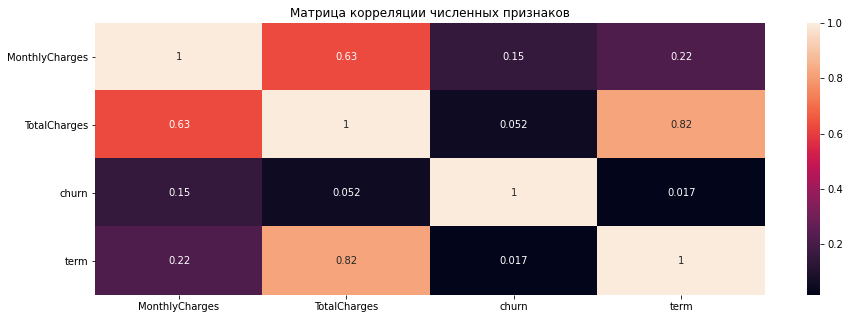

In [41]:
plt.figure(figsize=(15, 5))
plt.title('Матрица корреляции численных признаков')

sns.heatmap(data.corr(),annot = True)
plt.show()

Мы видим достаточно слабую корреляцию между числовыми данными и нашим таргетом. Наибольший интерес заслуживает наличие положительной взаимосвязи между сроком пользования услугой и общими затратами клиента (0,82), что является логичным, чем дольше срок тем больше клиент потратил.

Рассмотрим корреляцию смешанного набора признаков, используя phik библиотеку.

In [42]:
# построим таблицу корреляции смешанных признаков
phik_overview = data.phik_matrix()
# округлим значения коэффициентов для удобства
phik_overview.round(2)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'churn', 'term']


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn,term
Type,1.00,0.11,0.28,0.39,0.47,0.00,0.09,0.18,0.15,0.51,0.15,0.10,0.14,0.18,0.07,0.07,0.07,0.09,0.63
PaperlessBilling,0.11,1.00,0.37,0.47,0.20,0.00,0.24,0.01,0.17,0.23,0.00,0.20,0.16,0.06,0.34,0.33,0.25,0.08,0.03
PaymentMethod,0.28,0.37,1.00,0.40,0.34,0.00,0.29,0.24,0.22,0.32,0.26,0.28,0.31,0.27,0.38,0.38,0.34,0.21,0.35
MonthlyCharges,0.39,0.47,0.40,1.00,0.71,0.01,0.30,0.20,0.18,0.92,0.55,0.63,0.67,0.58,0.84,0.83,0.68,0.23,0.39
TotalCharges,0.47,0.20,0.34,0.71,1.00,0.00,0.14,0.38,0.08,0.49,0.52,0.62,0.64,0.55,0.64,0.64,0.57,0.30,0.85
gender,0.00,0.00,0.00,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00
SeniorCitizen,0.09,0.24,0.29,0.30,0.14,0.00,1.00,0.02,0.32,0.16,0.06,0.10,0.09,0.09,0.16,0.19,0.22,0.09,0.06
Partner,0.18,0.01,0.24,0.20,0.38,0.00,0.02,1.00,0.65,0.00,0.22,0.22,0.24,0.19,0.19,0.18,0.22,0.23,0.45
Dependents,0.15,0.17,0.22,0.18,0.08,0.00,0.32,0.65,1.00,0.11,0.12,0.03,0.01,0.10,0.02,0.06,0.03,0.05,0.20
InternetService,0.51,0.23,0.32,0.92,0.49,0.00,0.16,0.00,0.11,1.00,0.24,0.23,0.23,0.24,0.27,0.27,0.23,0.06,0.06


Для наглядности построим тепловую карту матрицы корреляции смешанных признаков.

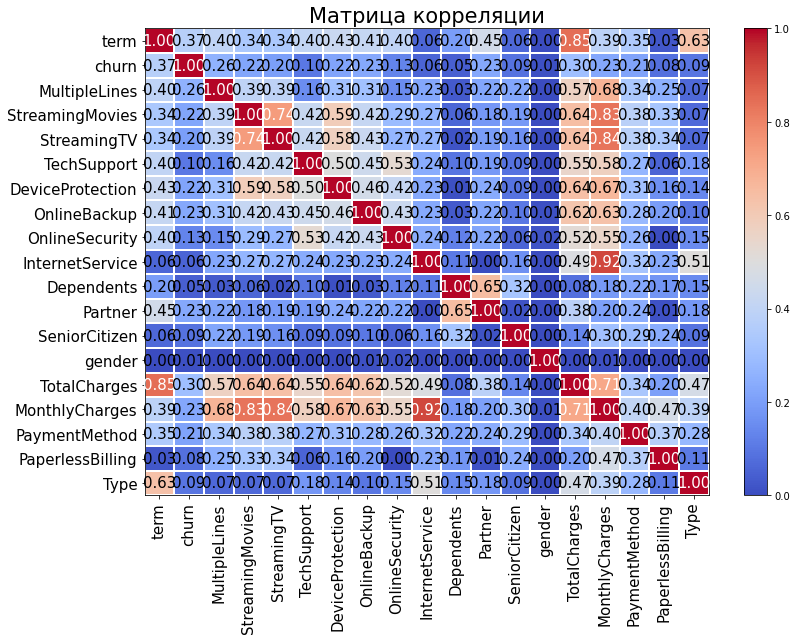

In [43]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r'Матрица корреляции',
                        fontsize_factor=1.5, 
                        figsize=(12,9))
plt.tight_layout();


На тепловой карте мы видим наличие мультиколлинеарности признаков DeviceProtection,TechSupport. 

У нас есть достаточно сильная зависимость наличия дополнительных интернет услуг (особенно InternetService) и ежемесячной стоимости(0.92). Чуть ниже (0.68) зависимость наличия возможности ведения параллельных линий во время звонка (MultipleLines) также на ежемесячную стоимость.

Также мы видим очевидную зависимость между нашим таргетом сроком пользования услугами и опять же общими затратами клиента.

При этом на срок пользования больше всего оказывают влияние такие факторы как общие затраты на услуги в целом (0.85), тип оплаты (0.63) и наличие супруга (0.45).
Пол клиента видимо совершенно не имеет значения.

'Деревянные модели" и бустинги не чувствительны к наличию мультиколлинеарности. А в логистической регрессии реализована регуляризация. Поэтому оставим все как есть.


### Выведем графики для визуализации наиболее интересных результатов корреляции признаков

Рассмотрим как отличается поведение клиентов в зависимости от разных факторов.

In [44]:
# выберем стиль для оформления графиков 
plt.style.use('bmh')

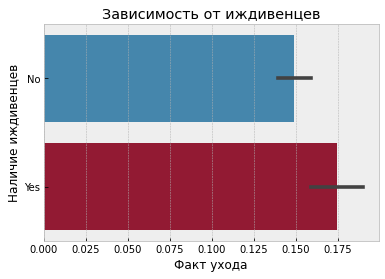

In [45]:
plt.figure()

sns.barplot(x=data['churn'],y=data['Dependents']);
plt.title ('Зависимость от иждивенцев');
plt.xlabel ('Факт ухода');
plt.ylabel ('Наличие иждивенцев');
plt.show()

Ушедших больше среди тех, у кого есть иждивенцы.

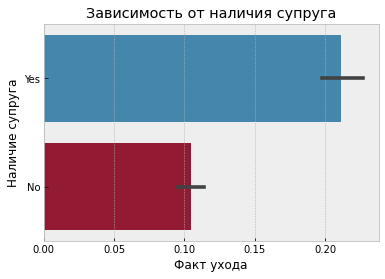

In [46]:
sns.barplot(x=data['churn'],y=data['Partner']);

plt.title ('Зависимость от наличия супруга');
plt.xlabel ('Факт ухода');
plt.ylabel ('Наличие супруга');
plt.show()

Ушедших больше среди тех, у кого есть супруг. Видимо семейные пары чаще пересматривают тарифы на услуги и ищут более выгодные компании, в целях экономии семейного бюджета.

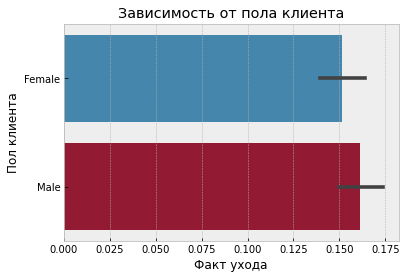

In [47]:
sns.barplot(x=data['churn'],y=data['gender']);

plt.title ('Зависимость от пола клиента');
plt.xlabel ('Факт ухода');
plt.ylabel ('Пол клиента');
plt.show()

Пол клиента практически не влияет на факт ухода. Видимо этот признак не такой уж существенный.

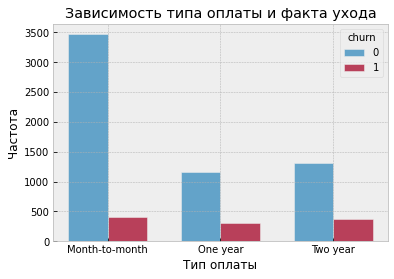

In [48]:
sns.histplot(data=data,x='Type',hue='churn', multiple="dodge",shrink=.7)

plt.title('Зависимость типа оплаты и факта ухода')
plt.ylabel('Частота')
plt.xlabel('Тип оплаты')
plt.show();

Больше всего уходят те, кто оплачивает ежемесячно. При длительном договоре вероятность ухода значительно снижается. Поэтому целесообразно рекомендовать компании ежемесячно отслеживать отток клиентов.

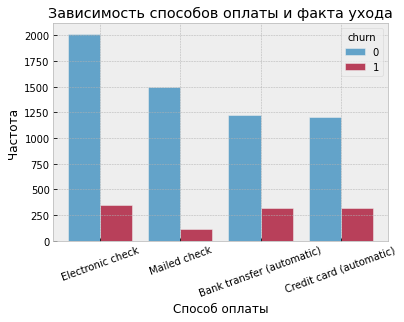

In [49]:
sns.histplot(data=data,x='PaymentMethod',hue='churn', multiple="dodge",shrink=.8)

plt.title('Зависимость способов оплаты и факта ухода')
plt.ylabel('Частота')
plt.xlabel('Способ оплаты')
plt.xticks(rotation = 20)
plt.show();

Ушедших больше среди тех, кому присылают электронный чек, видимо это неудобно для клиента и он испытывает трудности с оплатой.

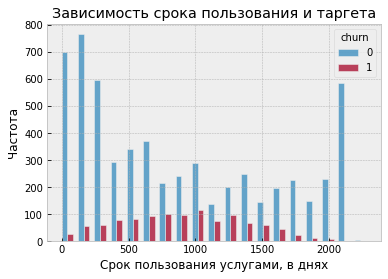

In [50]:
sns.histplot(data=data,x='term',hue='churn', multiple="dodge",shrink=.7)

plt.title('Зависимость срока пользования и таргета')
plt.ylabel('Частота')
plt.xlabel('Срок пользования услугами, в днях')
plt.show();

С увеличением срока пользования растет и количество ушедших клиентов.

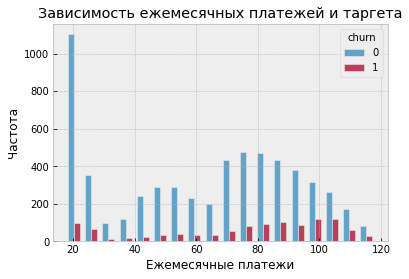

In [51]:
sns.histplot(data=data,x='MonthlyCharges',hue='churn', multiple="dodge",shrink=.7)

plt.title('Зависимость ежемесячных платежей и таргета')
plt.ylabel('Частота')
plt.xlabel('Ежемесячные платежи')
plt.show();

При повышении ежемесячных платежей количество ушедших клиентов также возрастает. Особенно это заметно в промежутке ежемесячной стоимости от 70 до 80. Видимо здесь идет критическая отметка и требуется вовремя отслеживать тех клиентов, у которых такие платежи и предлагать им какие-то скидки, чтобы снизить размер платежа.

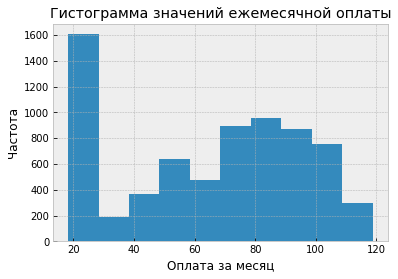

In [52]:
data['MonthlyCharges'].hist()

plt.title('Гистограмма значений ежемесячной оплаты'); 
plt.xlabel('Оплата за месяц'); 
plt.ylabel('Частота'); 


Мы видим, что пик суммы ежемесячной оплаты приходится на промежуток от 20 до 30.Видимо это самый минимальный платеж при подключении. Далее идет резкий спад оплаты, возможно это связано с тем, что многие клиенты кто попробовал услугу уходят. Поэтому надо активизировать анализ клиентов, которые подключились недавно и оплатили например только первый месяц.
В промежутке от 70 до 110 остались те клиенты, которых мы удержали и им были подключены дополнительные услуги, поэтому ежемесячный платеж вырос. 

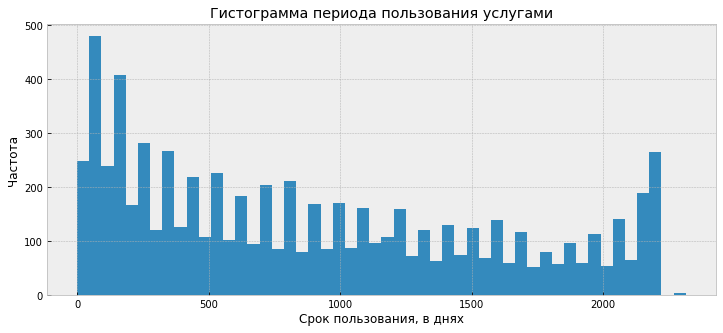

In [53]:
plt.figure(figsize = (12,5))
data['term'].hist(bins=(50))

plt.title('Гистограмма периода пользования услугами'); 
plt.xlabel('Срок пользования, в днях'); 
plt.ylabel('Частота'); 


In [54]:
data['term'].describe()

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: term, dtype: float64

Пик пользования приходится на промежуток от 50 до 200 дней. Далее идет спад и выравнивание. В среднем клиенты пользуются услугами около 2,4 лет.

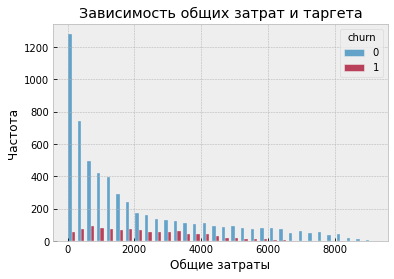

In [55]:
sns.histplot(data=data,x='TotalCharges',hue='churn', multiple="dodge",shrink=.7)

plt.title('Зависимость общих затрат и таргета')
plt.ylabel('Частота')
plt.xlabel('Общие затраты')
plt.show();

При повышении общих затрат до 1000 ед. количество ушедших клиентов возрастает. 

In [56]:
# удалим столбец `gender`
data = data.drop('gender', axis= 1)

In [57]:
data.shape

(7043, 18)

**Вывод по EDA**

После проведения исследовательского анализа наших данных можно сделать следующие выводы:

* из исходного датасета было удалено 4 неинформативных столбца: `BeginDate`,`EndDate`, `customerID`,`gender`;
* технологические пропуски в данных были заменены на значение "No";   
* в целевом признаке выявлен дисбаланс классов (доля ушедших 16%);
* дубликаты во всех данных и по customerID не обнаружены;
* после изучения всех признаков мы получили датасет размером (7043, 18);

Данные готовы к обучению моделей.

## Подготовка данных для обучения моделей

### Разбивка на выборки

Ранее мы ввели константу RANDOM_STATE = 220523

In [58]:
# cоздадим переменные для признаков и целевого признака

target = data['churn']
features = data.drop('churn', axis=1)

Далее разобьем данные на выборки. Разделим исходные данные на обучающую и тестовую выборки. 
Данные разобьем на 2 части, в соотношении 75:25. Добавим аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах. Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE,stratify = target
)

In [60]:
# выведем на экран размеры таблиц, которые хранятся в 4-х переменных 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5282, 17), (5282,), (1761, 17), (1761,))

## Обучение моделей
### Модель CatBoostClassifier

In [61]:
X_train_cb = X_train.copy()
X_test_cb = X_test.copy()

In [62]:
#численные признаки
num_cols = X_train.select_dtypes(exclude='object').columns.to_list()
num_cols

['MonthlyCharges', 'TotalCharges', 'term']

In [63]:
# создадим переменную с категориальными признаками для передачи в модель
cat_features = X_train.select_dtypes(include='object').columns.to_list()
cat_features

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [64]:
pipeline_catboost = Pipeline([
    ('cb', CatBoostClassifier(cat_features=cat_features,random_state=RANDOM_STATE))
])

parameters_catboost = {
    'cb__iterations': [300,400,500],
    'cb__depth': [3,6,9],
    'cb__learning_rate': [0.01, 0.15]
}

In [65]:
gs_model_cb = GridSearchCV(
    estimator = pipeline_catboost,
    param_grid=parameters_catboost, 
    scoring='roc_auc',
    cv=KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    n_jobs=-1)


%time
gs_model_cb.fit(X_train, y_train)

In [67]:
# выведем лучшие значения гиперпараметров, полученные на GridSearch

gs_model_cb_best_score = gs_model_cb.best_score_
gs_model_cb_best_params = gs_model_cb.best_params_
print(f'Best params CatBoostClassifier:{gs_model_cb.best_params_}')
print(f'ROC-AUC CatBoostClassifier:{gs_model_cb.best_score_}') 

Best params CatBoostClassifier:{'cb__depth': 3, 'cb__iterations': 500, 'cb__learning_rate': 0.15}
ROC-AUC CatBoostClassifier:0.9071715791531375


In [68]:
# инициализируем лучшую модель с подобранными гиперпараметрами
cb_best = CatBoostClassifier(random_state=RANDOM_STATE,
                            verbose=100,iterations=500,
                            learning_rate=0.15, depth=3,eval_metric='AUC',
                            early_stopping_rounds=20)

In [69]:
cb_best.fit(X_train_cb, y_train,
                  cat_features = cat_features,verbose=False)

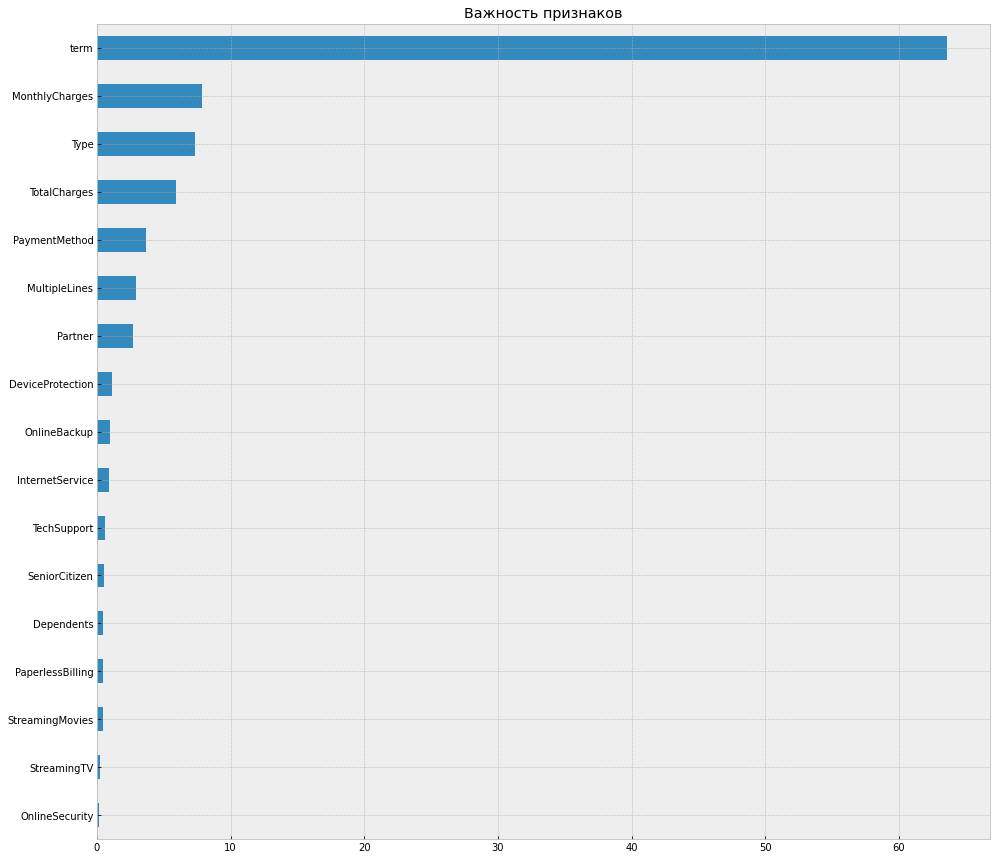

In [70]:
# построим гистограмму значимости признаков для модели CatBoost
# значения отсортированные по возрастанию влияния

plt.figure(figsize = (16,15))
importances = pd.Series(cb_best.feature_importances_,index=cb_best.feature_names_).sort_values()

# график
importances.plot.barh(grid=True, title='Важность признаков');

Срок пользования услугами оказался самым значимым признаком, что логично. Далее по значимости идут месячные платежи, общие затраты на услуги, тип оплаты и метод оплаты.

### Модель Ridge

Для кодирования категориальных признаков будем использовать OneHotEncoder и StandardScaler для численных признаков.

In [71]:
X_train_ridge = X_train.copy()
X_test_ridge = X_test.copy()

In [72]:
#категориальные признаки для OHE Ridge
ohe_features_ridge = X_train.select_dtypes(include='object').columns.to_list()
print(ohe_features_ridge)


['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [73]:
#численные признаки

num_features = X_train.select_dtypes(exclude='object').columns.to_list()
num_features

['MonthlyCharges', 'TotalCharges', 'term']

In [74]:
# кодируем категориальные признаки и масштабируем численные с помощью make_column_transformer

col_transformer_ridge = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False),
        ohe_features_ridge
    ),
    (
        StandardScaler(), 
        num_features
    ),remainder='passthrough',
    verbose_feature_names_out=False
)


X_train_ridge = pd.DataFrame(
    col_transformer_ridge.fit_transform(X_train_ridge),
    columns=col_transformer_ridge.get_feature_names_out()
)

#смотрим на результат
X_train_ridge.head()

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,MonthlyCharges,TotalCharges,term
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.664236,-0.928781,-1.235291
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.213546,0.972768,1.260148
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.646258,0.390374,1.570432
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.504582,1.384659,1.481152
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.237992,-0.060331,-0.481537


In [75]:
# если лучшей моделью будет Ridge, то
# трансформируем тестовую выборку
X_test_ridge = pd.DataFrame(
    col_transformer_ridge.transform(X_test_ridge),
    columns=col_transformer_ridge.get_feature_names_out()
)

#смотрим на результат
X_test_ridge.head()

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,MonthlyCharges,TotalCharges,term
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.425918,0.679670,0.146348
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.035914,-0.885860,-1.146011
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.547821,-0.326570,-0.567889
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171969,-0.906633,-1.191383
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.521028,-0.946222,-1.011360


In [76]:
#получились одинаковые признаки в тренировочной и тестовой выборках
(X_train_ridge.columns != X_test_ridge.columns).sum()

0

In [77]:
X_train_ridge = X_train.copy()

In [78]:
#random_state не перебирается, задаём его прямо в модели
model_ridge = Ridge(random_state=RANDOM_STATE)

pipeline_ridge = make_pipeline(col_transformer_ridge, model_ridge)

param_grid_ridge = {
    'ridge__alpha': np.arange(0, 0.21, 0.01),
}

gs_ridge_pl = GridSearchCV(
    pipeline_ridge, 
    param_grid=param_grid_ridge, 
    scoring='roc_auc',
    n_jobs=-1,error_score='raise'
)


In [79]:
gs_ridge_pl.fit(X_train_ridge, y_train)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',...
                                                                          'StreamingMovies',
                                                                          'MultipleLines']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'term'])],
                                                          verbose_feature_names_out=False)),
                                       ('ridge', Ridge(random_state=220523))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])},
             scoring='roc_auc')

In [80]:
# лучшее значение ROC-AUC на кросс-валидации
print(f'ROC-AUC Ridge: {gs_ridge_pl.best_score_}')
# лучшие гиперпараметры
print(f'best_params Ridge: {gs_ridge_pl.best_params_}')

ROC-AUC Ridge: 0.7639666980895014
best_params Ridge: {'ridge__alpha': 0.08}


### Модель случайного леса классификации RandomForestClassifier

In [81]:
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

In [82]:
#категориальные признаки для OHE RandomForestClassifier
ohe_features_rf = ohe_features_ridge.copy()
ohe_features_rf

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [83]:
#численные признаки
num_features = X_train.select_dtypes(exclude='object').columns.to_list()
num_features

['MonthlyCharges', 'TotalCharges', 'term']

In [84]:

col_transformer_rf = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False),
        ohe_features_rf
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)


X_train_rf = pd.DataFrame(
    col_transformer_rf.fit_transform(X_train_rf),
    columns=col_transformer_rf.get_feature_names_out()
)

#смотрим на результат
X_train_rf.head()

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,MonthlyCharges,TotalCharges,term
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,84.65,169.30,62.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,71.10,4165.04,1767.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,45.25,2941.25,1979.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,79.85,5030.55,1918.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,101.90,1994.18,577.0


In [85]:
model_rf = RandomForestClassifier(random_state=RANDOM_STATE)

pipline_rf = make_pipeline(col_transformer_rf, model_rf)

# подберем гиперпараметры, используя  GridSearchCV
param_rf = { 
    'n_estimators': [100, 150, 200],
    'max_depth' : [2, 5, 10, 20, 25, 30],
    'class_weight': ['balanced']
}

gs_model_rf = GridSearchCV(
    estimator=model_rf, 
    param_grid=param_rf, 
    scoring='roc_auc',error_score='raise',
     n_jobs=-1)


gs_model_rf.fit(X_train_rf, y_train)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(random_state=220523), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 5, 10, 20, 25, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc')

In [86]:
# лучшее значение ROC-AUC на кросс-валидации
print(f'best_score RandomForestClassifier: {gs_model_rf.best_score_}')
# лучшие гиперпараметры
print(f'best_params RandomForestClassifier: {gs_model_rf.best_params_}')      

best_score RandomForestClassifier: 0.8188187078387859
best_params RandomForestClassifier: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 150}


In [87]:
# выведем результаты
pd.DataFrame(
    [gs_model_cb.best_score_,gs_ridge_pl.best_score_, gs_model_rf.best_score_,], 
    index=['CatBoostClassifier','Ridge', 'RandomForestClassifier'], 
    columns=['ROC-AUC']
)

,ROC-AUC
CatBoostClassifier,0.907172
Ridge,0.763967
RandomForestClassifier,0.818819


### Тестирование лучшей модели на тестовой выборке

In [88]:
# инициализируем модель CatBoostClassifier с наилучшим значением метрики ROC-AUC
best_model = CatBoostClassifier(
                            random_state=RANDOM_STATE,
                            verbose=100,iterations=500,
                            learning_rate=0.15, depth=3,eval_metric='AUC',
                            early_stopping_rounds=20
)

best_model.fit(X_train_cb, y_train,cat_features = cat_features) 
predict_test = best_model.predict(X_test_cb)

0:	total: 5.07ms	remaining: 2.53s
100:	total: 596ms	remaining: 2.35s
200:	total: 1.24s	remaining: 1.84s
300:	total: 1.91s	remaining: 1.26s
400:	total: 2.62s	remaining: 646ms
499:	total: 3.27s	remaining: 0us


### Построение ROC кривой и расчет дополнительных метрик качества

Построим ROC-кривую для данной модели. Для этого найдем значения вероятностей классов для тестовой выборки. Значения вероятностей класса «1» сохраним в переменной probabilities_one_test.

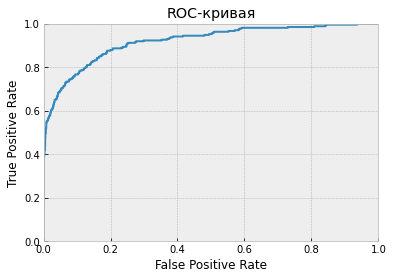

In [89]:
probabilities_test = best_model.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

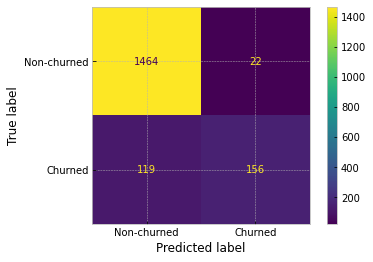

In [90]:
# выведем матрицу ошибок
cm = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=['Non-churned', 'Churned'])
disp.plot()
plt.show()

In [91]:
# рассчитаем дополнительные метрики
print(f'Accuracy: {accuracy_score(y_test, predict_test)}')    
print(f'Полнота: {recall_score(y_test, predict_test)}')     
print(f'Точность: {precision_score(y_test, predict_test)}')  
print(f'F1-мера: {f1_score(y_test,predict_test)}')          
print(f'AUC-ROC:{roc_auc_score(y_test,probabilities_one_test)}')


Accuracy: 0.919931856899489
Полнота: 0.5672727272727273
Точность: 0.8764044943820225
F1-мера: 0.6887417218543046
AUC-ROC:0.9192597577388963


Accuracy мы получили 0.92, но в нашем случае при дисбалансе классов данная метрика не совсем информативна.

Recall мы получили лишь 0.57, это говорит нам о том, что модель из всех склонных к оттоку клиентов находит лишь 57%.
Но при этом мы получили высокое значение Precision 0.88. Это говорит о том, что наша модель находит 88% склонных к оттоку и при этом они действительно уходят.

**Рассмотрим матрицу ошибок с точки зрения бизнеса.**

Представим, что у нас есть промокод, который составляет 30% от стоимости ежемесячных услуг для каждого клиента. Поставим задачу так: кто собирается уходить, тому выдадим промокод, а кто лояльный, промокод не будем давать. У нас появятся ошибки первого и второго рода.

Ошибки первого рода:

предсказание модели 1, значение таргета 0, мы выдали промокод лояльному клиенту.
Ошибки второго рода:   

предсказание модели 0, значение таргета 1, не выдали промокод клиенту, который склонен к оттоку.
Чтобы посчитать прибыль, рассмотрим такую схему:

если клиент на самом деле был лояльный, то мы потеряли 30% от стоимости месячного платежа (ошибка 1го рода)
если клиент был отточный, а мы не дали ему промокод, то мы потеряем 100% от стоимости ежемесячного платежа (ошибка второго рода).   

Рассчитаем убытки от выданных промокодов.

**Предсказания на тестовой выборке для модели CatBoost**

In [92]:
best_cat = gs_model_cb.best_estimator_
# промокод
PROMO = 0.3

In [93]:
X_test['pred_cat'] = best_cat.predict(X_test)
X_test['target'] = y_test

In [94]:
final_test = X_test[['MonthlyCharges','pred_cat','target']]
final_test

,MonthlyCharges,pred_cat,target
4904,107.55,0,0
4967,63.60,0,0
927,81.15,0,0
2306,69.85,0,0
4570,18.95,0,0
...,...,...,...
4932,80.65,0,0
4592,24.20,0,0
848,92.00,0,0
6953,82.00,0,0


**Убытки от выданных промокодов лояльным клиентам**


In [95]:
final_test.loc[
    (final_test['pred_cat']!=final_test['target'])
    &
    (final_test['pred_cat'] == 1)
]['MonthlyCharges'].sum()*PROMO

582.975

**Убытки от потери клиентов, которым не выдали промокодов лояльным**

In [96]:
final_test.loc[
    (final_test['pred_cat']!=final_test['target'])
    &
    (final_test['pred_cat']== 0)
]['MonthlyCharges'].sum()*PROMO

2459.355

Проверим на адекватность.

In [97]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(X_train,y_train)
dummy_model.score(X_train,y_train)

0.1563801590306702

Получили, что константная модель в 16 % случаев будет предсказывать класс 1, что соответсвует распределению классов в таргете.

Лучшей моделью, которая достигла требуемой метрики качества ROC-AUC>=0.85 вышла модель **CatBoostClassifier** с подобранными гиперпараметрами:    
random_state=RANDOM_STATE,    
iterations=500,   
learning_rate=0.15,    
depth=3.    
AUC-ROC на тестовых данных:0.9192597577388963. Точность: 0.8764044943820225.



## Общий вывод 

**Вывод**   

Мы провели работу по подготовке прототипа модели машинного обучения для оператора связи «Ниединогоразрыва.ком» 

**Цель проекта** - прогнозирование оттока клиентов.   

**Наша задача** - создание прототипа модели машинного обучения, который позволит оператору связи своевременно выявлять клиентов, планирующих уйти в ближайшее время. Это позволит компании предложить клиентам промокоды и специальные условия, тем самым сохранить клиента и увеличить прибыль.  

В нашем распоряжении были персональные данные о некоторых клиентах,информация об их тарифах и договорах, которые собрала команда оператора.

Данные находились в 4-х датасетах. В ходе работы все данные были объединены в один датасет по общему признаку `CustomerID`.

Работа была проведена в соответствии с первононачальным планом. Сложностей в процессе работы не возникло.

Была проведена загрузка исходных данных, их обзор и предобработка: 

* в столбце `EndDate` не везде была отмечена дата окончания пользования услугами. В ходе анализа мы заменили данные пропуски на дату выгрузки - 01.02.2020.
* найденные технологические пропуски после объединения датасетов были заполнены значениями "No". 
* дубликаты в данных отсутствовали. 
* аномалий не обнаружено. 
* создали столбец с таргетом `churn` на основе данных из столбца `EndDate` -  где '1' - клиент ушел, а '0' - клиент действующий.
* cоздали дополнительный признак - `term`, срок пользования услугой в днях;
* неинформативные (`CustomerID`) и столбцы, приводящие к утечке данных (`BeginDate`,`EndDate`)были удалены после создания таргета и дополнительного признака, т.к. не представляют важности при обучении модели. 
* привели в соответствие типы данных в столбцах `TotalCharges` и `SeniorCitizen`;
* обнаруженные пропуски в столбце `TotalCharges` были заменены на значение месячных платежей;

Далее мы провели исследовательский анализ данных и визуализировали с помощью графиков результаты зависимости поведения клиентов в двух группах от различных факторов и дополнительных услуг:
* изучили целевой признак и обнаружили дисбаланс классов, класса с меткой '1'было около 16%,оставшиеся были с меткой '0'.
* построили тепловую карту корреляции числовых признаков, выявили наличие положительной взаимосвязи между сроком пользования услугой и общими затратами клиента (0,82), что является логичным, чем дольше срок тем больше клиент потратил
* посмотрели на графиках наиболее интересные зависимости поведения клиентов от различных признаков;
* выяснили, что пол клиента практически не имеет значения, поэтому впоследствии данный признак был удален;
* на срок пользования больше всего оказывают влияние такие факторы как общие затраты на услуги в целом, тип и способ оплаты, наличие супруга.
* после изучения всех признаков мы получили датасет размером (7043, 18), готовый для обучения моделей.

Следующим шагом была проведена разбивка данных на обучающий и тестовый набор, с **размером тестовой выборки 0.25**. При разбивке добавили аргумент stratify, который позволил сохранить изначальное распределение таргета во всех новых датасетах. Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым.
Был введен параметр  **RANDOM_STATE = 220523**.
Были выделены признаки и целевой признак. 

**Так для обучения модели были использованы следующие 17 признаков:**

Type,PaperlessBilling,	PaymentMethod,	MonthlyCharges	TotalCharges,   
SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,   	DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,term.   

Далее мы провели обучение моделей машинного обучения, для выполнения поставленной цели. 
Ключевой метрикой качества был ROC-AUC, требовалось достичь значения >=0.85.

Нами было инициализировано 3 модели: Ridge, RandomForestClassifier, CatBoostClassifier.
Для подбора гиперпараметров в целях улучшения качества моделей, а также для проведения проверки качества был использован GridSearchCV.

Для моделей Ridge и RandomForestClassifier было проведено кодирование категориальных признаков методом OneHotEncoder и масштабирование численных признаков методом стандартизации StandardScaler.

Выбрав лучшую модель, которая достигла требуемого значения ROC-AUC,мы рассчитали ее качество на тестовой выборке. Также была построена ROC-кривая, рассчитаны дополнительные метрики качества и проведена проверка на адекватность лучшей модели в сравнении с константной моделью.

Также мы рассмотрели наиболее значимые признаки, которые позволили достигнуть нашей метрики.
Можем выделить следующие **наиболее важные признаки** при обучении модели:
* term;
* MonthlyCharges
* Type;
* TotalCharges;
* PaymentMethod;
* MultipleLines.

В этой связи рекомендуем бизнесу провести более детальный анализ значимых признаков и провести работу по улучшению качества данных услуг в целях максимизации прибыли.
		
Итак, лучшей моделью машинного обучения в нашем случае выбрана модель CatBoostClassifier, показав на тестовых данных значение 
ROC-AUC 0.92 (на обучающей 0.91).

**Гиперпараметры итоговой лучшей модели     
CatBoostClassifier(random_state=RANDOM_STATE,       
                   iterations=500,      
                   learning_rate=0.15,       
                   depth=3,verbose=100)**   

Исходя из критериев которые важны заказчику, **рекомендуем компании выбрать модель  CatBoostClassifier**. 

По матрице ошибок мы можем сказать, что количество истинно положительных ответов (то есть тех кто по прогнозу модели ушли из компании и фактически ушли) достаточно большое, что позволит нам использовать модель в своих прогнозах, не расходуя рекламный бюджет на привлечение новых клиентов. 

Недостатком данной модели является недостаточно высокое значения метрики recall - 0.51.Для бизнеса важно максимально точно отделить тех, кто хочет уйти от тех, кто бы остался. Если клиент хочет уйти в отток, то следует предложить ему скидку или выгодный тариф, чтобы он остался. А если он итак не собирался уходить, то не стоит тратить средства на его удержание. Поэтому следует еще провести работу над повышением данной метрики, возможно удалением части незначимых признаков.

Также мы рассчитали сумму убытков, которые может понести заказчик, в случае если выдаст промокоды лояльным клиентам в сравнении с убытками от потери клиентов, которым не выдали промокоды. Убытки,связанные с потерей клиента гораздо выше.
Для бизнеса это важно, потому что модель достаточно хорошо находит тех клиентов, которые собираются уйти, а это значит, что компания может принять меры для удержания клиента и получения прибыли от него в дальнейшем длительном периоде.

Метрика Precision говорит о том, что наша модель правильно определяет на 81% из всех клиентов именно клиентов склонных к оттоку и при этом они действительно уходят.

Для моделей Ridge и RandomForestClassifier не удалось достичь требуемого значения ROC-AUC.
Техника борьбы с дисбалансом (установка параметра class_weight = 'balanced') в данном случае также не помогли улучшить модели. Соответственно данные модели нам не подходят.

Дана рекомендация бизнесу, активно работать с теми клиентами,чье поведение (по прогнозам нашей модели) свидетельствует о том, что они уйдут из компании в ближайшее время.